**Objetivo:** Gerar relatório amostral classificando os diferentes padrões de tabelas   

In [1]:
from langchain_core.output_parsers import PydanticOutputParser
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

from schema import Table
from prompt import prompt_image
from utils import encode_base64

load_dotenv()

True

Carregar imagens das tabelas e converter em base64

In [126]:
# files
from pathlib import Path
import re

path = Path('../data/imgs/')

images_base64 = [(p.name, encode_base64(p)) for p in path.rglob('*.*')]

In [127]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser

prompt = ChatPromptTemplate.from_messages(
        [
            ("system", "The presented images may display different patterns. Group the images into categories. Count the elements. Restriction: assign each image to only one category."),
         MessagesPlaceholder('images')
        ]
)

In [155]:
input = []
for file, img in images_base64:
    input.extend([
        {"type": "text","text": file},
        {"type": "image_url","image_url": {"url": f"data:image/bmp;base64,{img}"}}, 
        ])
    

"System: The presented images may display different patterns. Group the images into categories. Count the elements. Restriction: assign each image to only one category.\nHuman: [{'type': 'text', 'text': 'tabela1 - Copia (2).bmp'}, {'type': 'image_url', 'image_url': {'url': ''}}]"
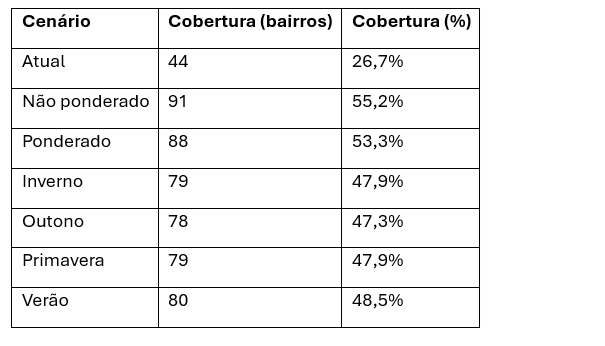

In [156]:
prompt.format(images=[HumanMessage(content=input[0:2])])

In [116]:
# Instância o modelo
model = ChatOpenAI(model="gpt-4o-mini")

In [ ]:
chain = prompt | model

In [157]:
res = chain.invoke({'images':[HumanMessage(content=input)]})

In [158]:
res

AIMessage(content='Here are the categories for the images based on their content:\n\n### Categories:\n\n1. **Basic Coverage Tables**\n   - Contains basic data about coverage in different scenarios.\n   - **Images:** \n     - tabela1 - Copia (2)\n     - tabela1 - Copia\n     - tabela5 - Copia\n     - tabela2 - Copia (2)\n     - tabela2 - Copia\n     - tabela1\n     - tabela5\n\n2. **Vertical Format Tables**\n   - Presents data in a vertical layout for better comparison.\n   - **Images:**\n     - tabela4 - Copia (2)\n     - tabela4\n     - tabela4 - Copia\n     - tabela4 - Copia (2)\n\n3. **Coverage with Observations**\n   - Includes notes or observations regarding the coverage data.\n   - **Images:**\n     - tabela5\n     - tabela5 - Copia (2)\n\n4. **Difference Calculation Tables**\n   - Shows differences in coverage compared to a baseline scenario.\n   - **Images:**\n     - tabela3 - Copia\n     - tabela3\n     - tabela2 - Copia (2)\n\n### Count of Elements in Each Category:\n\n- **Ba

In [159]:
print(res.content)

Here are the categories for the images based on their content:

### Categories:

1. **Basic Coverage Tables**
   - Contains basic data about coverage in different scenarios.
   - **Images:** 
     - tabela1 - Copia (2)
     - tabela1 - Copia
     - tabela5 - Copia
     - tabela2 - Copia (2)
     - tabela2 - Copia
     - tabela1
     - tabela5

2. **Vertical Format Tables**
   - Presents data in a vertical layout for better comparison.
   - **Images:**
     - tabela4 - Copia (2)
     - tabela4
     - tabela4 - Copia
     - tabela4 - Copia (2)

3. **Coverage with Observations**
   - Includes notes or observations regarding the coverage data.
   - **Images:**
     - tabela5
     - tabela5 - Copia (2)

4. **Difference Calculation Tables**
   - Shows differences in coverage compared to a baseline scenario.
   - **Images:**
     - tabela3 - Copia
     - tabela3
     - tabela2 - Copia (2)

### Count of Elements in Each Category:

- **Basic Coverage Tables:** 7
- **Vertical Format Tables:** 4
